<a href="https://colab.research.google.com/github/munisdev86/stable-diffusion/blob/main/dreambooth_sdxl_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install diffusers --upgrade


In [4]:
!pip install invisible-watermark>=0.2.0

In [5]:
!pip install  transformers accelerate safetensors

In [4]:
from huggingface_hub.repocard import RepoCard
from diffusers import DiffusionPipeline
import torch

lora_model_id = "Muniyaraj/output_model"
card = RepoCard.load(lora_model_id)
base_model_id = card.data.to_dict()["base_model"]

pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.load_lora_weights(lora_model_id)
image = pipe("A picture of a muniyarajs closeup , formal suite, half body pose, sun kissed, 8k", num_inference_steps=25).images[0]
image.save("muni1.png")

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

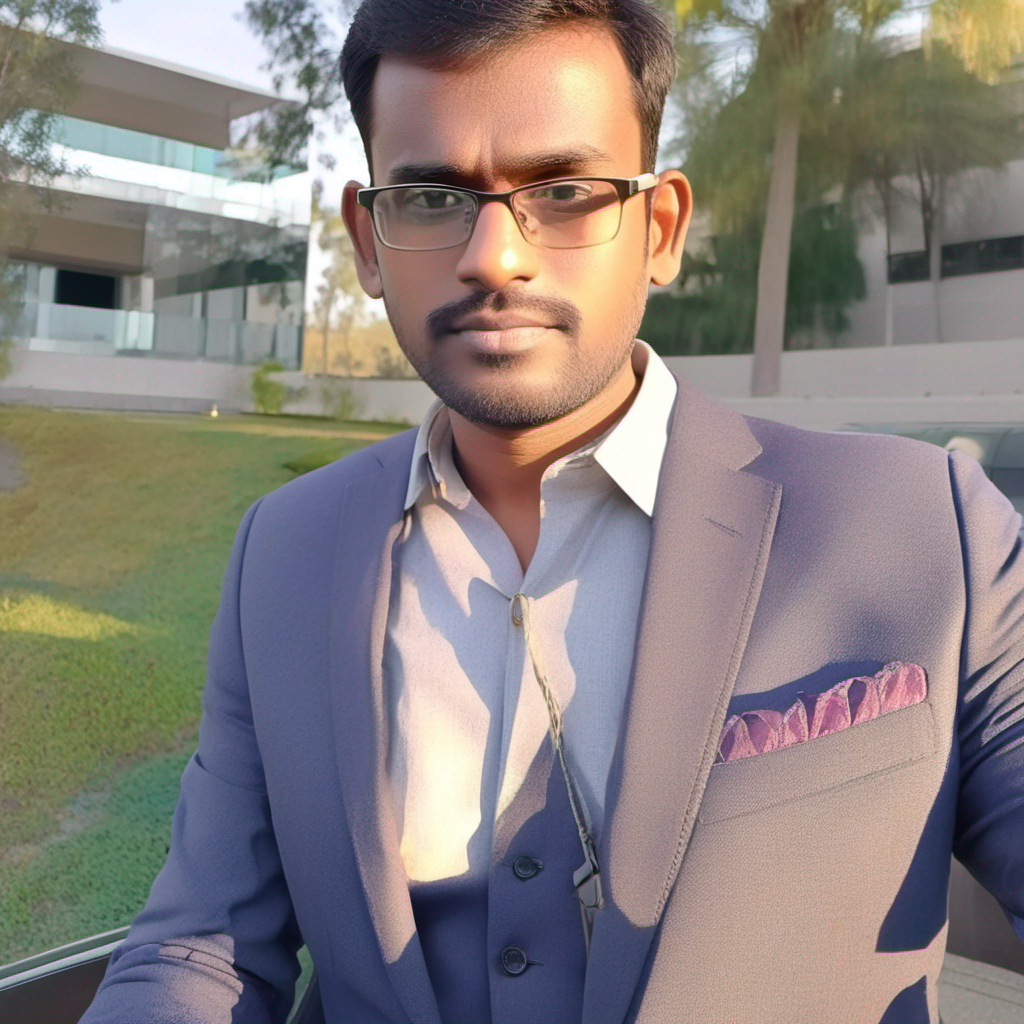

In [5]:
image

In [6]:
image = pipe("A picture of a muniyarajs in formal suite, half body pose, sun kissed, 8k", num_inference_steps=25).images[0]
image.save("muni2.png")

  0%|          | 0/25 [00:00<?, ?it/s]

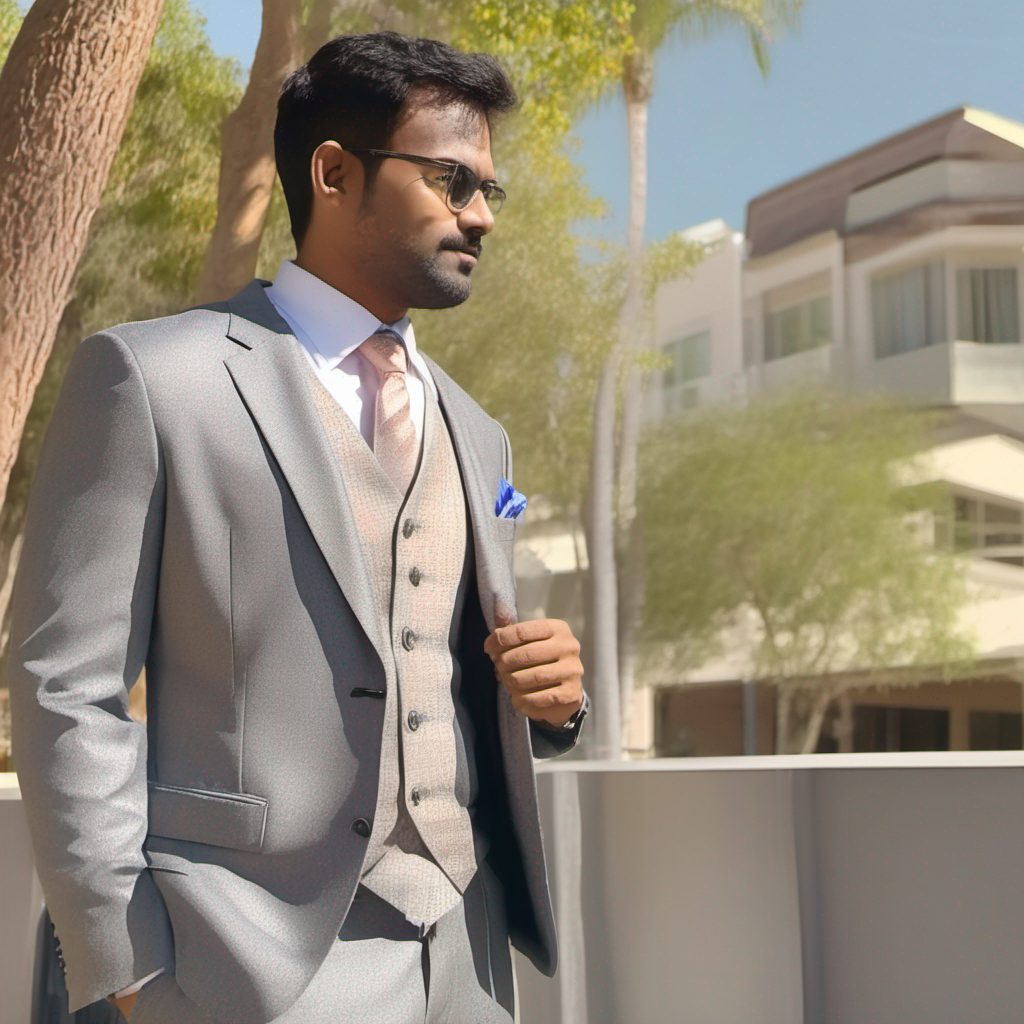

In [8]:
image

In [7]:
#refiner

In [6]:
from huggingface_hub.repocard import RepoCard
from diffusers import DiffusionPipeline, StableDiffusionXLImg2ImgPipeline
import torch

lora_model_id = "Muniyaraj/output_model"
card = RepoCard.load(lora_model_id)
base_model_id = card.data.to_dict()["base_model"]

# Load the base pipeline and load the LoRA parameters into it.
pipe = DiffusionPipeline.from_pretrained(base_model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")
pipe.load_lora_weights(lora_model_id)

# Load the refiner.

refiner = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16"
)
refiner.to("cuda")

prompt = "A picture of a muniyarajs closeup , formal suite, half body pose, sun kissed, 8k"
generator = torch.Generator("cuda").manual_seed(0)

# Run inference.
image = pipe(prompt=prompt, output_type="latent", generator=generator).images[0]
image = refiner(prompt=prompt, image=image[None, :], generator=generator).images[0]
image.save("refined_muni1.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

OutOfMemoryError: ignored

In [2]:
image = pipe(prompt=prompt, output_type="latent", generator=generator).images[0]
image = refiner(prompt=prompt, image=image[None, :], generator=generator).images[0]
image.save("refined_muni1.png")

NameError: ignored

In [1]:
!nvidia-smi

Fri Jul 28 03:30:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [16]:
import torch
torch.cuda.empty_cache()
